# Лабораторна робота №2

Імпортуємо потрібні бібліотеки

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Декларуємо функцію f(x+y) = x2+y2

In [2]:
def f(x):
    x, y = x
    return x ** 2 + y ** 2

Генеруємо набір даних

In [3]:
X = []
for i in range(10):
    for j in range(10):
        X.append([i, j])

y = [f(x) for x in X]

Розбиваємо набір даних на тренувальну та тестову вибірки

In [4]:
split = 80
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

Декларуємо функцію для візуалізації результатів навчання

In [5]:
def visualize_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Тренування', color='red')
    plt.plot(epochs, val_loss, label='Валідація')
    plt.title('Витрати при тренуванні та валідації')
    plt.legend()
    plt.grid()
    plt.show()

### 1. Тип мережі: feed forward backprop

### a) 1 внутрішній шар з 10 нейронами

Створюємо модель

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


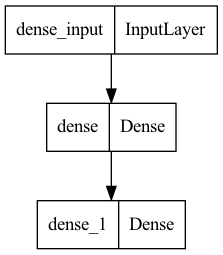

In [6]:
model_ffb1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1)
])
model_ffb1.summary()
display(tf.keras.utils.plot_model(model_ffb1))

Компілюємо модель

In [7]:
model_ffb1.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.001,
            decay_steps=75,
            decay_rate=0.96)),
    loss='mae', metrics=['mae'])
history_ffb1 = model_ffb1.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
1/3 [=========>....................] - ETA: 0s - loss: 51.7713 - mae: 51.7713

2023-04-06 11:40:02.000023: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 0s 42ms/step - loss: 47.9457 - mae: 47.9457 - val_loss: 104.4014 - val_mae: 104.4014
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: 47.7306 - mae: 47.7306 - val_loss: 104.0925 - val_mae: 104.0925
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 47.5121 - mae: 47.5121 - val_loss: 103.7939 - val_mae: 103.7939
Epoch 4/500
3/3 [==============================] - 0s 11ms/step - loss: 47.3001 - mae: 47.3001 - val_loss: 103.4967 - val_mae: 103.4967
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 47.0865 - mae: 47.0865 - val_loss: 103.2033 - val_mae: 103.2033
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 46.8780 - mae: 46.8780 - val_loss: 102.9065 - val_mae: 102.9065
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 46.6672 - mae: 46.6672 - val_loss: 102.6055 - val_mae: 102.6055
Epoch 8/500
3/3 [==============================] - 0s 9ms/st

Візуалізуємо результати навчання

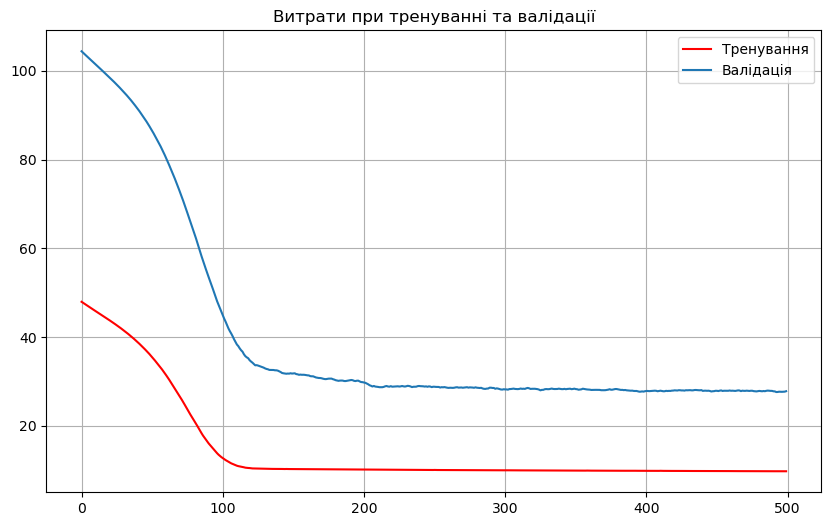

In [8]:
visualize_history(history_ffb1)

### b) 1 внутрішній шар з 20 нейронами

Створюємо модель

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                60        
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


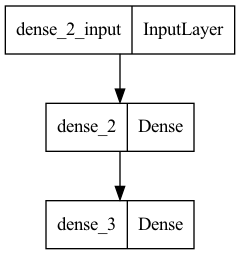

In [9]:
model_ffb2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1)
])
model_ffb2.summary()
display(tf.keras.utils.plot_model(model_ffb2))

Компілюємо модель

In [10]:
model_ffb2.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.001,
            decay_steps=75,
            decay_rate=0.96)),
    loss='mae', metrics=['mae'])
history_ffb2 = model_ffb2.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
3/3 [==============================] - 0s 34ms/step - loss: 45.4782 - mae: 45.4782 - val_loss: 100.7829 - val_mae: 100.7829
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 45.2319 - mae: 45.2319 - val_loss: 100.3483 - val_mae: 100.3483
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 44.9832 - mae: 44.9832 - val_loss: 99.9111 - val_mae: 99.9111
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 44.7339 - mae: 44.7339 - val_loss: 99.4585 - val_mae: 99.4585
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 44.4763 - mae: 44.4763 - val_loss: 99.0018 - val_mae: 99.0018
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 44.2175 - mae: 44.2175 - val_loss: 98.5504 - val_mae: 98.5504
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 43.9625 - mae: 43.9625 - val_loss: 98.1158 - val_mae: 98.1158
Epoch 8/500
3/3 [==============================] - 0s 9ms/ste

Візуалізуємо результати навчання

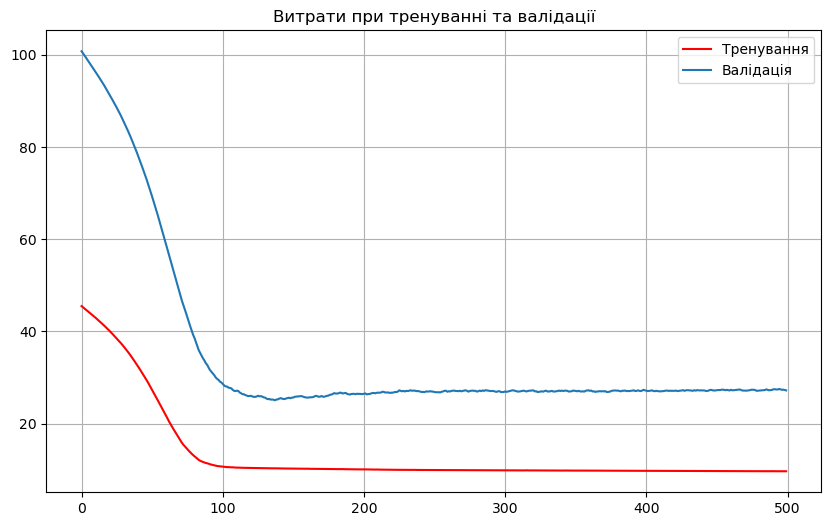

In [11]:
visualize_history(history_ffb2)

### 2. Тип мережі: cascade - forward backprop

### a) 1 внутрішній шар з 20 нейронами

Створюємо модель

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 20)           60          ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 22)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 1)            23          ['concatenate[0][0]']        

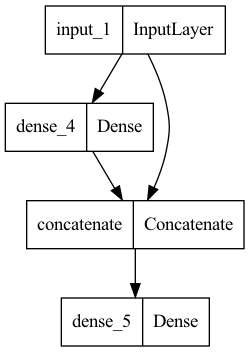

In [12]:
inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(20, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1)(tf.keras.layers.concatenate([inputs, x]))

model_cf1 = tf.keras.Model(inputs, outputs)
model_cf1.summary()
display(tf.keras.utils.plot_model(model_cf1))

Компілюємо модель

In [13]:
model_cf1.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.001,
            decay_steps=75,
            decay_rate=0.96)),
    loss='mae', metrics=['mae'])
history_cf1 = model_cf1.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
3/3 [==============================] - 0s 34ms/step - loss: 47.2773 - mae: 47.2773 - val_loss: 103.6328 - val_mae: 103.6328
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 47.0671 - mae: 47.0671 - val_loss: 103.3269 - val_mae: 103.3269
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 46.8554 - mae: 46.8554 - val_loss: 103.0328 - val_mae: 103.0328
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 46.6480 - mae: 46.6480 - val_loss: 102.7365 - val_mae: 102.7365
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 46.4396 - mae: 46.4396 - val_loss: 102.4457 - val_mae: 102.4457
Epoch 6/500
3/3 [==============================] - 0s 9ms/step - loss: 46.2351 - mae: 46.2351 - val_loss: 102.1557 - val_mae: 102.1557
Epoch 7/500
3/3 [==============================] - 0s 9ms/step - loss: 46.0324 - mae: 46.0324 - val_loss: 101.8591 - val_mae: 101.8591
Epoch 8/500
3/3 [==============================] - 0

Візуалізуємо результати навчання

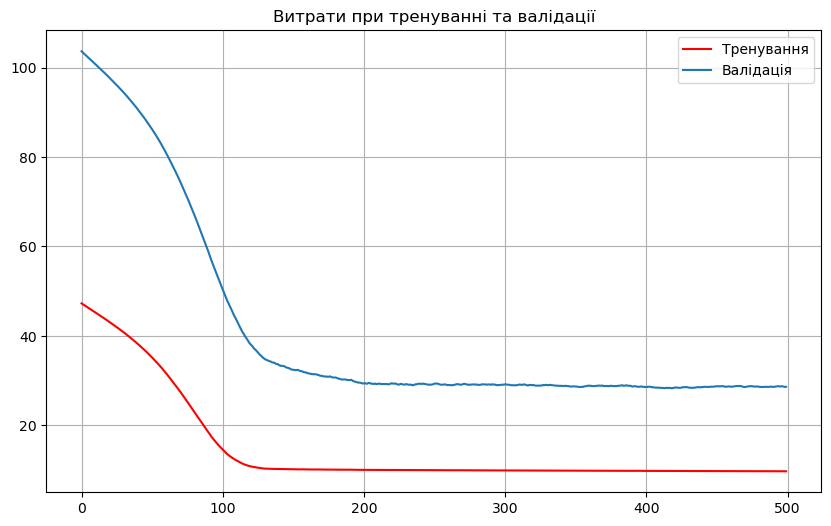

In [14]:
visualize_history(history_cf1)

### b) 2 внутрішніх шари по 10 нейронів у кожному

Створюємо модель

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 10)           30          ['input_2[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 12)           0           ['input_2[0][0]',                
                                                                  'dense_6[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 10)           130         ['concatenate_1[0][0]']    

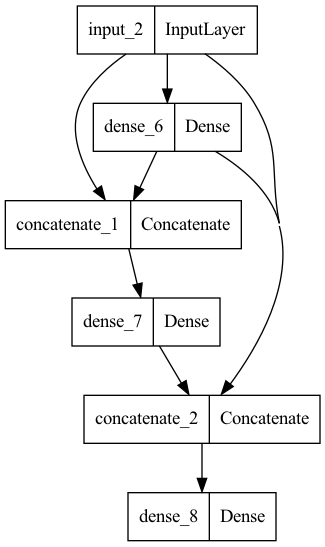

In [15]:
inputs = tf.keras.Input(shape=(2,))
x0 = tf.keras.layers.Dense(10, activation='relu')(inputs)
x1 = tf.keras.layers.Dense(10, activation='relu')(tf.keras.layers.concatenate([inputs, x0]))
outputs = tf.keras.layers.Dense(1)(tf.keras.layers.concatenate([inputs, x0, x1]))

model_cf2 = tf.keras.Model(inputs, outputs)
model_cf2.summary()
display(tf.keras.utils.plot_model(model_cf2))

Компілюємо модель

In [16]:
model_cf2.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.001,
            decay_steps=75,
            decay_rate=0.96)),
    loss='mae', metrics=['mae'])
history_cf2 = model_cf2.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
3/3 [==============================] - 0s 36ms/step - loss: 48.3190 - mae: 48.3190 - val_loss: 100.5192 - val_mae: 100.5192
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 48.0499 - mae: 48.0499 - val_loss: 100.1578 - val_mae: 100.1578
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 47.7887 - mae: 47.7887 - val_loss: 99.8078 - val_mae: 99.8078
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 47.5339 - mae: 47.5339 - val_loss: 99.4717 - val_mae: 99.4717
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 47.2821 - mae: 47.2821 - val_loss: 99.1246 - val_mae: 99.1246
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 47.0313 - mae: 47.0313 - val_loss: 98.7915 - val_mae: 98.7915
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 46.7866 - mae: 46.7866 - val_loss: 98.4530 - val_mae: 98.4530
Epoch 8/500
3/3 [==============================] - 0s 9ms/ste

Візуалізуємо результати навчання

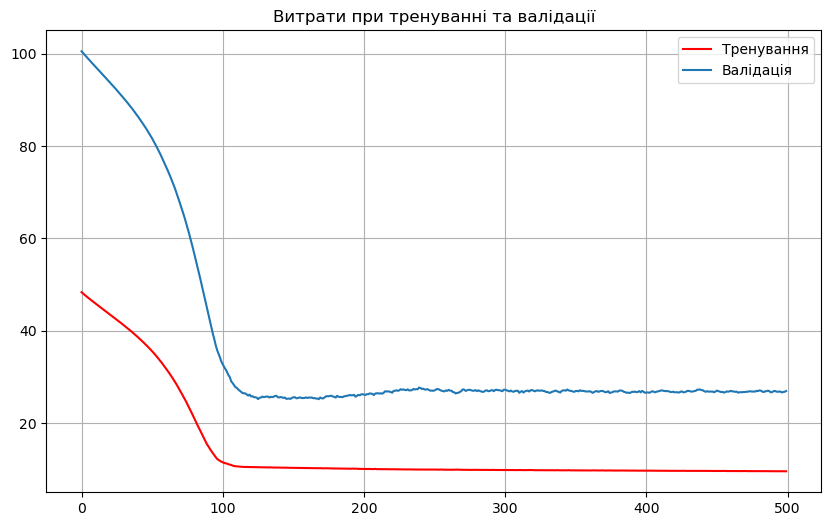

In [17]:
visualize_history(history_cf2)

### 3.Тип мережі: elman backprop

### a) 1 внутрішній шар з 15 нейронами

Створюємо модель

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15)                270       
                                                                 
 dense_9 (Dense)             (None, 1)                 16        
                                                                 
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


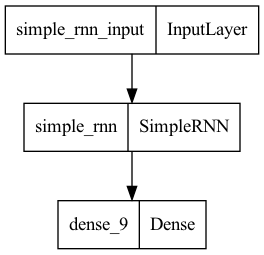

In [18]:
model_elman1 = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(15, activation='relu', input_shape=(1,2)),
    tf.keras.layers.Dense(1)
])
model_elman1.summary()
display(tf.keras.utils.plot_model(model_elman1))

Змінюємо формат вхідних даних

In [19]:
X_train = np.reshape(X_train, (np.shape(X_train)[0], 1, np.shape(X_train)[1])).tolist()
X_test = np.reshape(X_test, (np.shape(X_test)[0], 1, np.shape(X_test)[1])).tolist()

Компілюємо модель

In [20]:
model_elman1.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.001,
            decay_steps=75,
            decay_rate=0.96)),
    loss='mae', metrics=['mae'])
history_elman1 = model_elman1.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
3/3 [==============================] - 0s 57ms/step - loss: 45.0856 - mae: 45.0856 - val_loss: 96.1190 - val_mae: 96.1190
Epoch 2/500
3/3 [==============================] - 0s 12ms/step - loss: 44.9330 - mae: 44.9330 - val_loss: 95.8838 - val_mae: 95.8838
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 44.7776 - mae: 44.7776 - val_loss: 95.6518 - val_mae: 95.6518
Epoch 4/500
3/3 [==============================] - 0s 11ms/step - loss: 44.6203 - mae: 44.6203 - val_loss: 95.4111 - val_mae: 95.4111
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 44.4603 - mae: 44.4603 - val_loss: 95.1706 - val_mae: 95.1706
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 44.3025 - mae: 44.3025 - val_loss: 94.9243 - val_mae: 94.9243
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 44.1396 - mae: 44.1396 - val_loss: 94.6719 - val_mae: 94.6719
Epoch 8/500
3/3 [==============================] - 0s 10ms/ste

Візуалізуємо результати навчання

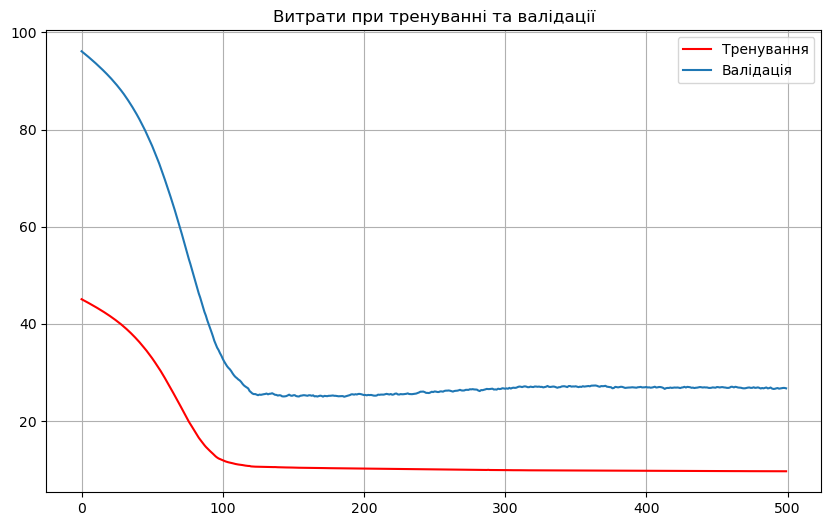

In [21]:
visualize_history(history_elman1)

### b) 3 внутрішніх шари по 5 нейронів у кожному

Створюємо модель

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 5)                 40        
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 5)                 30        
                                                                 
 dense_12 (Dense)            (None, 1)                 6         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


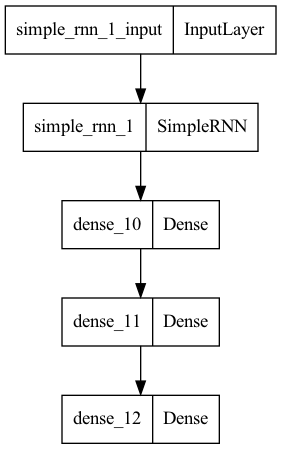

In [22]:
model_elman2 = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(5, activation='relu', input_shape=(1,2)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_elman2.summary()
display(tf.keras.utils.plot_model(model_elman2))

Компілюємо модель

In [25]:
model_elman2.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.001,
            decay_steps=75,
            decay_rate=0.96)),
    loss='mae', metrics=['mae'])
history_elman2 = model_elman2.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
3/3 [==============================] - 1s 83ms/step - loss: 45.0246 - mae: 45.0246 - val_loss: 99.9975 - val_mae: 99.9975
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: 45.0220 - mae: 45.0220 - val_loss: 99.9947 - val_mae: 99.9947
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 45.0194 - mae: 45.0194 - val_loss: 99.9920 - val_mae: 99.9920
Epoch 4/500
3/3 [==============================] - 0s 13ms/step - loss: 45.0169 - mae: 45.0169 - val_loss: 99.9892 - val_mae: 99.9892
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 45.0143 - mae: 45.0143 - val_loss: 99.9865 - val_mae: 99.9865
Epoch 6/500
3/3 [==============================] - 0s 11ms/step - loss: 45.0118 - mae: 45.0118 - val_loss: 99.9838 - val_mae: 99.9838
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 45.0093 - mae: 45.0093 - val_loss: 99.9810 - val_mae: 99.9810
Epoch 8/500
3/3 [==============================] - 0s 11ms/ste

Візуалізуємо результати навчання

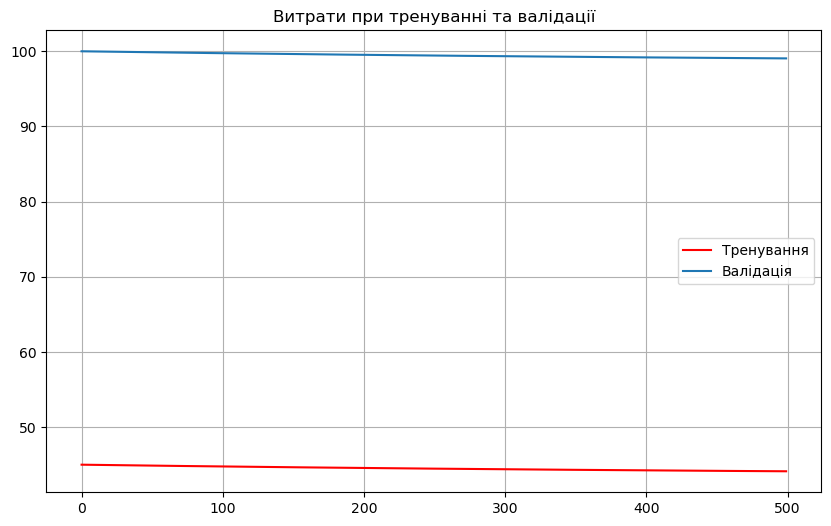

In [26]:
visualize_history(history_elman2)